In [25]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [26]:
df = pd.read_csv("./대전광역시 유성구_지역화폐 발급월별 소비금액 지수 데이터_20220531.csv", encoding='CP949')

In [27]:
df = df.drop(columns=['광역시도코드','시군구코드', '법정동코드'], axis=1) 

In [28]:
df["발급년"]=df["발급년"].astype(str)
df["발급월"]=df["발급월"].astype(str)

In [29]:
for i in range(2,3):
    df["발급월"+str(i)] = df["발급월"].astype('str').str.zfill(i) # 1~9월까지 0을 채워서 두 자리까지..

In [22]:
df["발급년월"] = df["발급년"] + df["발급월2"] #컬럼 두 개 합치기 = 2xxx0x 형태로 만들기

KeyError: '발급년'

In [20]:
df = df[["발급년월","광역시도명","시군구명","법정동명","연령대","성별","지수_이용건수","지수_이용금액"]] #컬럼 순서 바꾸기

In [21]:
from datetime import datetime

df['발급년월']=df['발급년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

TypeError: strptime() argument 1 must be str, not Timestamp

In [9]:
df

,발급년월,광역시도명,시군구명,법정동명,연령대,성별,지수_이용건수,지수_이용금액
0,2020-05-01,대전광역시,동구,인동,30대,여성,100.00,100.00
1,2020-05-01,대전광역시,동구,천동,40대,여성,100.00,100.00
2,2020-05-01,대전광역시,동구,가오동,30대,남성,100.00,100.00
3,2020-05-01,대전광역시,동구,가오동,40대,여성,100.00,100.00
4,2020-05-01,대전광역시,동구,신흥동,30대,남성,100.00,100.00
...,...,...,...,...,...,...,...,...
190493,2022-05-01,충청남도,계룡시,엄사면,40대,여성,70.00,72.27
190494,2022-05-01,충청남도,계룡시,신도안면,30대,남성,83.33,131.14
190495,2022-05-01,충청남도,계룡시,신도안면,30대,여성,23.08,54.05
190496,2022-05-01,충청남도,계룡시,신도안면,40대,남성,150.00,295.51


In [15]:
month_sum = df.groupby("발급년월")['지수_이용금액'].sum()

In [16]:
month_mean = df.groupby("발급년월")['지수_이용금액'].mean()

In [17]:
month_mean

발급년월
2020-05-01    653.787119
2020-06-01    866.167961
2020-07-01    584.252449
2020-08-01    132.550497
2020-09-01     61.669276
2020-10-01    121.992489
2020-11-01    370.738253
2020-12-01    133.274420
2021-01-01    167.276101
2021-02-01    161.594976
2021-03-01    178.109160
2021-04-01    152.873347
2021-05-01    244.426402
2021-06-01    149.022151
2021-07-01    136.083121
2021-08-01    130.846941
2021-09-01    179.086189
2021-10-01    111.499159
2021-11-01    214.105356
2021-12-01    128.642596
2022-01-01    296.787155
2022-02-01    150.494612
2022-03-01    115.457649
2022-04-01    115.692011
2022-05-01    119.494424
Name: 지수_이용금액, dtype: float64

In [12]:
month_sum

발급년월
2020-05-01    14768397.22
2020-06-01    20892837.39
2020-07-01    12271054.19
2020-08-01     1341543.58
2020-09-01      387529.73
2020-10-01      982771.49
2020-11-01     5486555.41
2020-12-01     1046204.20
2021-01-01     1519536.10
2021-02-01     1354004.30
2021-03-01     1413830.51
2021-04-01     1017066.38
2021-05-01     2060025.72
2021-06-01      870736.43
2021-07-01      665038.21
2021-08-01      529930.11
2021-09-01      771682.39
2021-10-01      315654.12
2021-11-01      936282.72
2021-12-01      310157.30
2022-01-01      919149.82
2022-02-01      234621.10
2022-03-01      106567.41
2022-04-01       62126.61
2022-05-01       44571.42
Name: 지수_이용금액, dtype: float64

<AxesSubplot:>

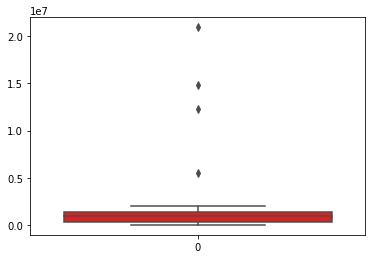

In [13]:
sns.boxplot(data = month_sum, color = 'red')